<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Ольга! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

## Сборный проект

**Описание проекта** 

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

In [2]:
#!pip install torch torchvision numpy

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Лично меня очень утомляют простыни логов после установки библиотек. И как правило, их все равно никто не читает. Можно добавить флаг -q , будет гораздо аккуратноее.
    
    !pip install -q torch
    
------------------
    
Мне кажется без этих установок можно обойтись. Ведь эти библиотеки уже установлены в твое локальное окружение, повторная установка не нужна.
    
А что касается совместимости, то тут тоже "не угадаешь". Насколько я знаю эти библиотеки уже установлены в большинстве облачных DL/DS сред, например kaggle/Google Colab или ЯндексПрактикум.
    
Ведь ты не устанавливаешь другие, не менее важные библиотеки?
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Согласна. Закомментировала.
</div>

## 1. Исследовательский анализ данных

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import re
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torchvision
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from torchvision.models import ResNet18_Weights
from PIL import Image
import cv2

from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, BatchNormalization
from keras.activations import relu, elu, linear, sigmoid


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [4]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Honor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Honor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Honor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Honor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Honor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
DATA_PATH = 'D:/Practicum/Project_5/to_upload/'

In [7]:
labels = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'), sep=',')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Спасибо! Исправила.
</div>

In [8]:
def df_show(df):
    display(df.head(10))
    display(df.info())
    display(df.describe())
    display('Дубликаты: ',df.duplicated().sum())

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Оборачивать результат работы метода  .info() в функцию print() или display() это лишнее. Метод  info() и сам напечатает тебе нужную информацию. А вот через print()/display() ты выводишь только то,что данный метод возвращает - т.е. None
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Не советую использовать функцию `print()` для вывода датафреймов, получается не очень красиво. В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать функцию `display()`
    
-----------------------
    
Крашу комментарий в красный цвет, т.к. это один из заключительных проектов, а смотреть а то, как print выводит датафрейм дико неудобно.  Я думаю что это резко ухудшит восприятие проекта при его размещении в портфолио, а исправить не сложно.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Исправила на display. Теперь выглядит лучше.
</div>

In [9]:
df_show(labels)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


None

,image,query_id,query_text
count,5822,5822,5822
unique,1000,977,977
top,3364151356_eecd07a23e.jpg,2600867924_cd502fc911.jpg#2,"Two dogs , one brown and white and one black and white , run on a field ."
freq,10,34,34


'Дубликаты: '

0

**Результат загрузки train_dataset.csv** 

Загружена информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>. - Данные соответствуют описанию.

Всего кол-во строк 5822, из них 1000 изображений уникальные, 977 уникальных описаний.

Дубликатов нет.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

**ExpertAnnotations**

In [10]:
expert = pd.read_csv(os.path.join(DATA_PATH, 'ExpertAnnotations.tsv'), sep='\t', header=None)

In [11]:
df_show(expert)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,1,1,1
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,1,1,1
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5822 non-null   object
 1   1       5822 non-null   object
 2   2       5822 non-null   int64 
 3   3       5822 non-null   int64 
 4   4       5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


None

,2,3,4
count,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999
std,0.787084,0.856222,0.904087
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000


'Дубликаты: '

0

**Результат загрузки ExpertAnnotations** 

Экспертные оценки также содержат 5822 записи. Данные соответствуют описанию в задании.

Нет дубликатов и нет пропусков.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты ограничиваешь  знакомство с данными выводом head и info и describe. Это безусловно полезно, но мало для содержательного EDA, Попробую сформулировать вопросы, ответить на которые будет интересно:
    
  - Количество уникальных изображений в обучающем и тестовом наборах
  - Количество уникальных запросов  
  - Количество оценок в экспертном и краудсорсинговом наборах.
  - Что представляют из себя экспертные оценки, что представляют из себя краудсорсинговые оценки 
  - Соответствие изображений и описаний друг другу в обучающем и тестовом наборах (оказывается практически все описания и изображения в файле test_queries соответствуют друг другу.
  - Обрати внимание, что query_id содержит в себе имя изображения, к которому он 100% соответствует (1177994172_10d143cb8d.jpg#0 - это query_id, первая часть - это имя файла, и через решетку порядковый  номер описания для этого файла).   
  - Также было бы интересно познакомиться с изображениями, входящими в датасеты.  
    
    
И самое главное - понимание с какими данными мы будем продолжать работу (как будем производить объединение данных)
 </div>

**Агрегируем оценки экспертов в одну по принципу голосования большинства.**

In [12]:
expert.columns = ['image', 'query_id', '1', '2', '3']

In [13]:
def vote(row):
    votes = [row['1'], row['2'], row['3']]
    vote_count = Counter(votes)
    max_votes = max(vote_count.values())
    lst = [i for i in vote_count.keys() if vote_count[i]==max_votes]
    if len(lst) == 1:
        return lst[0]
    else:
        return

In [14]:
expert['sum_vote'] = expert.apply(vote, axis=1)

In [15]:
expert.sample(10)

,image,query_id,1,2,3,sum_vote
4230,3473264983_67917a931f.jpg,3494394662_3edfd4a34c.jpg#2,1,1,2,1.0
3138,3143155555_32b6d24f34.jpg,820169182_f5e78d7d19.jpg#2,3,3,3,3.0
1026,2238019823_79318d1f11.jpg,70995350_75d0698839.jpg#2,2,2,3,2.0
2094,2715035273_8fc8b1291c.jpg,2764178773_d63b502812.jpg#2,1,1,2,1.0
1847,260520547_944f9f4c91.jpg,2891617125_f939f604c7.jpg#2,1,2,2,2.0
3019,3109704348_c6416244ce.jpg,1446053356_a924b4893f.jpg#2,2,2,2,2.0
2228,280706862_14c30d734a.jpg,3363750526_efcedc47a9.jpg#2,3,3,3,3.0
3700,3290105461_7590f23371.jpg,537559285_29be110134.jpg#2,2,2,2,2.0
2306,2854207034_1f00555703.jpg,2856080862_95d793fa9d.jpg#2,1,1,2,1.0
574,180094434_b0f244832d.jpg,180094434_b0f244832d.jpg#2,4,4,4,4.0


In [16]:
expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5822 non-null   object 
 1   query_id  5822 non-null   object 
 2   1         5822 non-null   int64  
 3   2         5822 non-null   int64  
 4   3         5822 non-null   int64  
 5   sum_vote  5696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 273.0+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст исключим из датасета.

In [17]:
expert.dropna(axis = 'index', subset = ['sum_vote'], inplace = True)

In [18]:
expert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5696 non-null   object 
 1   query_id  5696 non-null   object 
 2   1         5696 non-null   int64  
 3   2         5696 non-null   int64  
 4   3         5696 non-null   int64  
 5   sum_vote  5696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 311.5+ KB


In [19]:
expert['sum_vote'].value_counts()

sum_vote
1.0    3327
2.0    1566
3.0     492
4.0     311
Name: count, dtype: int64

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, получены оценки где есть "большинство" </div>

Приведем оценки экспертов к диапазону от 0 до 1.

In [20]:
expert['prob_vote'] = (expert['sum_vote'] - 1)/3

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
да, использование линейного преобразования в нашем случае самое простое и быстрое </div>

In [21]:
expert['prob_vote'].value_counts()

prob_vote
0.000000    3327
0.333333    1566
0.666667     492
1.000000     311
Name: count, dtype: int64

**CrowdAnnotations**

In [22]:
crowd = pd.read_csv('D:/Practicum/Project_5/to_upload/CrowdAnnotations.tsv', sep='\t', header=None)

In [23]:
df_show(crowd)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47830 non-null  object 
 1   1       47830 non-null  object 
 2   2       47830 non-null  float64
 3   3       47830 non-null  int64  
 4   4       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


None

,2,3,4
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


'Дубликаты: '

0

In [24]:
crowd.columns = ['image', 'query_id', 'crowd_rate', 'crowd_count_pos', 'crowd_count_neg']

In [25]:
crowd.sample(1)

,image,query_id,crowd_rate,crowd_count_pos,crowd_count_neg
39037,3605676864_0fb491267e.jpg,2729655904_1dd01922fb.jpg#2,0.0,0,3


**Результат загрузки CrowdAnnotations** 

Краудсорсинговые оценки содержат большое кол-во записей - 47830. Данные соответствуют описанию в задании.

Нет дубликатов и нет пропусков.

**Объединим оценки и исходный датасет**

Для объединения с экспертными оценками используем inner соединение.

In [26]:
marks = pd.merge(labels, expert, on = ['image', 'query_id'], how='inner')

In [27]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5696 non-null   object 
 1   query_id    5696 non-null   object 
 2   query_text  5696 non-null   object 
 3   1           5696 non-null   int64  
 4   2           5696 non-null   int64  
 5   3           5696 non-null   int64  
 6   sum_vote    5696 non-null   float64
 7   prob_vote   5696 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 356.1+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 да, здесь срабатывает inner, потому что исходно в этих датафреймах содержатся одни и те же объекты (пары изображение + описание) </div>

Для объединения с краудсорсинговыми оценками используем соединение left

In [28]:
marks = pd.merge(marks, crowd, on = ['image', 'query_id'], how='left')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

In [29]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            5696 non-null   object 
 1   query_id         5696 non-null   object 
 2   query_text       5696 non-null   object 
 3   1                5696 non-null   int64  
 4   2                5696 non-null   int64  
 5   3                5696 non-null   int64  
 6   sum_vote         5696 non-null   float64
 7   prob_vote        5696 non-null   float64
 8   crowd_rate       2258 non-null   float64
 9   crowd_count_pos  2258 non-null   float64
 10  crowd_count_neg  2258 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 489.6+ KB


In [30]:
marks.head()

,image,query_id,query_text,1,2,3,sum_vote,prob_vote,crowd_rate,crowd_count_pos,crowd_count_neg
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1,1,1,1.0,0.000000,0.0,0.0,3.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1,1,1,1.0,0.000000,NaN,NaN,NaN
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1,2,2,2.0,0.333333,0.0,0.0,3.0
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,4,4,4,4.0,1.000000,1.0,3.0,0.0
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1,1,1,1.0,0.000000,NaN,NaN,NaN


In [31]:
marks['crowd_rate'].isna()

0       False
1        True
2       False
3       False
4        True
        ...  
5691    False
5692     True
5693     True
5694    False
5695     True
Name: crowd_rate, Length: 5696, dtype: bool

In [32]:
def prob_vote(row):
    if pd.isna(row['crowd_rate']):
        return row['prob_vote']
    else:
        return row['prob_vote']*0.6 + row['crowd_rate']*0.4

In [33]:
marks['match'] = marks.apply(prob_vote, axis=1)

In [34]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            5696 non-null   object 
 1   query_id         5696 non-null   object 
 2   query_text       5696 non-null   object 
 3   1                5696 non-null   int64  
 4   2                5696 non-null   int64  
 5   3                5696 non-null   int64  
 6   sum_vote         5696 non-null   float64
 7   prob_vote        5696 non-null   float64
 8   crowd_rate       2258 non-null   float64
 9   crowd_count_pos  2258 non-null   float64
 10  crowd_count_neg  2258 non-null   float64
 11  match            5696 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 534.1+ KB


In [35]:
marks['match'].value_counts()

match
0.000000    3322
0.200000     805
0.333333     656
1.000000     230
0.400000     179
0.533333     142
0.333333      79
0.666667      73
0.866667      62
0.666667      53
0.800000      35
0.466667      18
0.733333      18
0.600000       5
0.133333       4
0.500000       2
0.280000       2
0.300000       2
0.700000       2
0.560000       2
0.720000       2
0.400000       2
0.100000       1
Name: count, dtype: int64

In [36]:
image_text_match = marks[['image', 'query_id', 'query_text', 'match']]

In [37]:
image_text_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5696 non-null   object 
 1   query_id    5696 non-null   object 
 2   query_text  5696 non-null   object 
 3   match       5696 non-null   float64
dtypes: float64(1), object(3)
memory usage: 178.1+ KB


**Выводы**

В результате исследовательского анализа данных были загружены все датасеты. Экспертные оценки были объединены в одну по принципу большинства голосов. Там где большинство не было определено, эти оценки были удалены. К оценкам экспертов для уточнения были добавлены краудсорсинговые оценки в тех записях, где они присутствовали. 

Получили датасет со ссылками на изображение, идентификатором запроса, текстом запроса и целевым показателем - вероятность соответствия изображения и текста.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, получен итоговый датафрейм где есть признаки (пары изображение + описание) и таргет (оценка сответствия). С этим датафреймом можем продолжить дальнейшую работу.</div>

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

This image is unavailable in your country in compliance with local laws

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [38]:
#nltk.download('stopwords')

In [39]:
#nltk.download('omw-1.4')

In [40]:
#nltk.download('punkt')

In [41]:
#nltk.download('wordnet')

In [42]:
#.download('averaged_perceptron_tagger')

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Это технические ячейки. Попробуй все команды по загрузке недостающих библиотек соединить в одну ячейку (сейчас они растянулись почти на экран). Также было бы удобнее переместить их в начало, после импортов.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Сделала. Предыдущий код закомментировала.
</div>

In [43]:
lemmatizer = WordNetLemmatizer()

In [44]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [45]:
def lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return ' '.join(lemmatized_words)

In [46]:
def clear_text(text):
    retext = text.lower()
    retext = re.sub(r'[^a-zA-Z\s]', '', retext)
    retext = re.sub(r'\s+', ' ', retext)
    return retext#" ".join(retext.split())

In [47]:
image_text_match['text_lem'] = image_text_match['query_text'].apply(lambda x: lemmatize(clear_text(x)))

C:\Users\Honor\AppData\Local\Temp\ipykernel_12932\2241748749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_text_match['text_lem'] = image_text_match['query_text'].apply(lambda x: lemmatize(clear_text(x)))


In [48]:
image_text_match['text_lem'].sample(5)

5045                           a brown dog jump over an obstacle
3358                    two dog jump for a ball on a green field
1502    a mule be carring a man in a cart next to some palm tree
5478      two people run down the beach and one of them be point
2585                             a man wakeboard on choppy water
Name: text_lem, dtype: object

**Исключим из обучающего датасета пары, которые, исходя из подготовленного списка слов, могут попадать под юридические ограничения.**

In [49]:
exclude_words = ['boy', 'child', 'girl', 'children', 'baby', 'kid', 'infant', 'youngster', 'babe', 'toddler']

In [50]:
image_text_match = image_text_match.reset_index(drop = True)

In [51]:
image_text_match['text_lem_list'] = image_text_match['text_lem'].str.split(' ')

In [52]:
image_text_match.head()

,image,query_id,query_text,match,text_lem,text_lem_list
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,a young child be wear blue goggles and sit in a float in a pool,"[a, young, child, be, wear, blue, goggles, and, sit, in, a, float, in, a, pool]"
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,a young child be wear blue goggles and sit in a float in a pool,"[a, young, child, be, wear, blue, goggles, and, sit, in, a, float, in, a, pool]"
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.2,a young child be wear blue goggles and sit in a float in a pool,"[a, young, child, be, wear, blue, goggles, and, sit, in, a, float, in, a, pool]"
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0,a young child be wear blue goggles and sit in a float in a pool,"[a, young, child, be, wear, blue, goggles, and, sit, in, a, float, in, a, pool]"
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,a young child be wear blue goggles and sit in a float in a pool,"[a, young, child, be, wear, blue, goggles, and, sit, in, a, float, in, a, pool]"


In [53]:
image_toExclude = []
for index,row in image_text_match.iterrows():
    if any(word in row['text_lem_list'] for word in exclude_words):
        #image_toExclude.append(row['query_id'])
        if row['query_id'][:-2] not in image_toExclude:
            image_toExclude.append(row['query_id'][:-2])    

In [54]:
image_toExclude[:5]

['2549968784_39bfbe44f9.jpg',
 '2718495608_d8533e3ac5.jpg',
 '3545652636_0746537307.jpg',
 '1714316707_8bbaa2a2ba.jpg',
 '2140182410_8e2a06fbda.jpg']

In [55]:
image_text_match.shape

(5696, 6)

In [56]:
image_text_match_adults = image_text_match[~image_text_match['image'].isin(image_toExclude)]

In [57]:
image_text_match_adults.shape

(4006, 6)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Спасибо за подсказку. Сделала второй вариант.
</div>

## 3. Векторизация изображений

**Сделаем векторизацию изображений с использованием модели ResNet50 из библиотеки PyTorch.**

In [58]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    
    # Преобразование для входного изображения
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    image_tensor = preprocess(image)
    return image_tensor.unsqueeze(0)  # Добавить размерности для батча

In [59]:
# Функция для векторизации изображений
def get_image_vectors(folder_path, image_paths):
    # Загрузить предобученную модель ResNet18
    model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
    model.eval()  # Установить модель в режим оценки

    # Список для сохранения векторов
    vectors = []
    
    def my_hook(module_, input_, output_):
                nonlocal my_output
                my_output = output_
    a_hook = model.avgpool.register_forward_hook(my_hook)      

    for image_path in tqdm(image_paths):
        # Загрузка и преобразование изображения
        image_tensor = preprocess_image(folder_path+image_path)#'D:/Practicum/Project_5/to_upload/train_images/data/'+image_path)

        # Извлечение признаков
        with torch.no_grad():  # Не сохранять вычисления для градиентов
            my_output = None
          
            model(image_tensor)
            vectors.append(np.squeeze(my_output))#numpy())  # Добавляем вектор в список
    a_hook.remove() 
       
    return vectors

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд, использование hook это усложнение без лишней необходимости. 
    
Будет гораздо проще и надежнее взять предобученную модель и отрезать у неё один последний слой. Именно такой подход был дан в теории к спринту (единственное что там ошибка и отрезать нужно только один слой, а не два).
    
----------------
    
Также будет гораздо эффективнее создать hook один раз ВНЕ ЦИКЛА, а в цикле просто брать значение.
    
----------------
    
И мне показалось удобнее добавить прогресс-бар, чтобы понимать сколько будет занимать эта операция.
    
```python
   
from tqdm.notebook import tqdm

# Функция для векторизации изображений
def get_image_vectors(folder_path, image_paths):
    # Загрузить предобученную модель ResNet18
    model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
    model.eval()  # Установить модель в режим оценки

    # Список для сохранения векторов
    vectors = []

    def my_hook(module_, input_, output_):
        nonlocal my_output
        my_output = output_

    a_hook = model.avgpool.register_forward_hook(my_hook)   
    
    for image_path in tqdm(image_paths):
        # Загрузка и преобразование изображения
        image_tensor = preprocess_image(folder_path+image_path)

        # Извлечение признаков
        with torch.no_grad():  # Не сохранять вычисления для градиентов
            my_output = None
         
            model(image_tensor)
            vectors.append(my_output.squeeze().cpu().numpy())  # Извлекаем тензор и преобразуем в NumPy
    a_hook.remove()

    return vectors    
    
```    

Это вариант в котором вебхук создается один раз и добавлен прогресс-бар.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Поправила.
</div>

In [60]:
image_vectors = get_image_vectors(os.path.join(DATA_PATH, 'train_images/data/'), image_text_match_adults['image'].tolist())

  0%|          | 0/4006 [00:00<?, ?it/s]

In [71]:
len(image_vectors[0])

512

**Выводы**
C помощью обученной модели ResNet18 получили векторы изображений с кол-ом признаков: 512.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

## 4. Векторизация текстов

**Сделаем векторизацию текстового описания одним из следующих методов: TF-IDF; BERT; word2vec.**

In [65]:
stop_words = list(set(stopwords.words('english')))

In [66]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

In [67]:
text_tf_idf = count_tf_idf.fit_transform(image_text_match_adults['text_lem'])

In [68]:
text_tf_idf.shape

(4006, 1155)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас вектора рассчитаны с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

**Выводы**
  
C помощью TF-IDF получили векторы текстовых описаний с кол-ом признаков: 1155.

## 5. Объединение векторов

In [72]:
train_vectors = np.hstack([image_vectors, text_tf_idf.toarray()])

In [73]:
train_vectors.shape

(4006, 1667)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

In [74]:
image_text_match_adults = image_text_match_adults.reset_index(drop=True)

In [75]:
df_vectors = pd.DataFrame(train_vectors)

In [76]:
df_vectors_full = pd.concat([df_vectors, image_text_match_adults['match'],image_text_match_adults['image']], axis=1)

In [77]:
df_vectors_full.head()

,0,1,2,3,4,5,6,7,8,9,...,1659,1660,1661,1662,1663,1664,1665,1666,match,image
0,0.693981,3.031816,2.916986,0.951921,0.936226,1.245219,0.826550,1.108058,0.169696,0.365278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,1056338697_4f7d7ce270.jpg
1,0.428876,1.151235,1.185725,1.280534,0.032984,2.268047,0.465652,0.580445,0.641632,0.069480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,1262583859_653f1469a9.jpg
2,2.199276,1.652242,2.472461,0.968294,0.613416,0.603528,2.909682,0.313733,1.213049,0.338153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,2621415349_ef1a7e73be.jpg
3,0.476787,0.516116,1.505918,0.879465,0.001574,0.585607,0.055786,0.104646,0.206305,1.083965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,3155451946_c0862c70cb.jpg
4,1.859863,2.073175,1.116258,1.751575,0.208847,1.309822,0.316693,0.456552,2.370871,0.082150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,3222041930_f642f49d28.jpg


In [78]:
df_vectors_full.shape

(4006, 1669)

**Выводы**
В результате объединения текстовых векторов и векторов изображений получили общий пул из 1669 признаков и 4006 аписей. К признакам добавили целевое значение и ссылку на изображение. Ссылка на изображение нужна для корректного разделения данных на обучающую и тестовую выборки.

## 6. Обучение модели предсказания соответствия

Разделим данные на обучающую и тестовые выборки таким образом, чтобы одно и то же изображение попало только в одну из этих выборок. Для этого используем параметр groups=df_vectors_full['image'].

In [79]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, valid_indices = next(gss.split(X=df_vectors_full.drop(columns='match'), y=df_vectors_full['match'], groups=df_vectors_full['image']))
train_df, valid_df = df_vectors_full.loc[train_indices], df_vectors_full.loc[valid_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Исправила на valid.
</div>

In [80]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1659,1660,1661,1662,1663,1664,1665,1666,match,image
0,0.693981,3.031816,2.916986,0.951921,0.936226,1.245219,0.826550,1.108058,0.169696,0.365278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,1056338697_4f7d7ce270.jpg
1,0.428876,1.151235,1.185725,1.280534,0.032984,2.268047,0.465652,0.580445,0.641632,0.069480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,1262583859_653f1469a9.jpg
2,2.199276,1.652242,2.472461,0.968294,0.613416,0.603528,2.909682,0.313733,1.213049,0.338153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,2621415349_ef1a7e73be.jpg
5,0.008137,0.257185,0.903971,0.503855,1.025678,0.299034,1.353390,1.832877,0.591914,0.682503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,343218198_1ca90e0734.jpg
6,0.343501,3.721849,0.822014,1.093337,0.410870,0.183371,0.025834,0.917406,0.137004,0.135811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.278454,0.0,0.0,3718964174_cb2dc1615e.jpg


In [81]:
train_df.shape

(2784, 1669)

In [82]:
X_train = train_df.drop(columns=['match','image'])
y_train = train_df['match']

In [83]:
#train_df[3].value_counts()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Какую информацю мы можем извлечь? ведь применение value_counts происходит не к категориальному признаку, а к вектору признаков длинной 1471?</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Я смотрела эти признаки, размышляя, нужно ли масштабировать. Это лишний код. Закомментировала.
</div>

In [84]:
valid_df.shape

(1222, 1669)

In [85]:
X_valid = valid_df.drop(columns=['match','image'])
y_valid = valid_df['match']

**Выбор метрики качества**

Планируется использовать модель линейной регрессии и нейронную сеть для предсказания вероятности соответствия текста и изображения. В качестве метрики оценки качества предсказания вероятности подойдет MSE - среднее квадратичное отклонение предсказанных значений от истинных значений.

**Линейная регрессия**

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно перед линейной регрессией и нейронкой я настаиваю на масштабировании  признаков, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Ок, попробую масштабировать.
</div>

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Использовала DummyRegressor & LinearRegression для сравнения самих моделей и их метрик качества.
</div>

**DummyRegressor & LinearRegression на немасштабированных данных**

In [87]:
def LR_DM_model(X_train, X_valid, y_train, y_valid):
    lm = LinearRegression().fit(X_train, y_train) 
    lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
    y_predict = lm.predict(X_valid) 
    y_predict_dummy_mean = lm_dummy_mean.predict(X_valid) 
    
    print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_valid, y_predict_dummy_mean))) 
    print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_valid, y_predict))) 
    
    print("r2_score (dummy mean): {:.2f}".format(r2_score(y_valid, y_predict_dummy_mean))) 
    print("r2_score (linear model): {:.2f}".format(r2_score(y_valid, y_predict))) 

In [88]:
LR_DM_model(X_train, X_valid, y_train, y_valid)

Mean squared error (dummy): 0.08
Mean squared error (linear model): 18551318115460036165632.00
r2_score (dummy mean): -0.00
r2_score (linear model): -241396206400191781142528.00


**DummyRegressor & LinearRegression на масштабированных данных**

In [89]:
LR_DM_model(X_train_scaled, X_valid_scaled, y_train, y_valid)

Mean squared error (dummy): 0.08
Mean squared error (linear model): 57266302314770180603904.00
r2_score (dummy mean): -0.00
r2_score (linear model): -745169051994839178018816.00


**Выводы:**

Метрика MSE дает качество оценки модели лучше.
На представленных моделях лучше выглядит dummy regressor.

**LinearRegression**

In [209]:
#model = LinearRegression()
#param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
#№               'positive': [True,False]}
#grid_search = GridSearchCV(model, param_space, scoring='neg_mean_squared_error', cv=5)
#grid_search.fit(X_train, y_train)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
выше я написал тебе, что у тебя уже есть валидационая выборка. Поэтому применение в этом проекте кросс-валидации для подбора гипперпаарметров мне кажется избыточным</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Параметр n_jobs определяет количество свободных процессорных ядер, которые будут выделены на обучение моделит. Т.е. он определяет то, КАК именно модель будет обучаться, но никак не влияет на полученный результат.

Поэтому делая подбор этого параметра в цикле ты просто увеличиваешь затраты на машинное время, но не получаешь никакой выгоды в качестве модели. Не важно, будет модель обучаться на 1, 5, 10 или 15 процесорных ядрах, результат будет одинаковый. Кстати, еще не факт что на машине будут эти самые 15 процессорных ядер.
    
    


</div>

In [210]:
#rmse_linear_regr = np.sqrt((grid_search.best_score_)*-1)
#print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
#print ('Метрика лучшей модели по кросс валидации:', grid_search.best_score_*(-1))

In [211]:
#preds_test = grid_search.best_estimator_.predict(X_valid) 
#print("MSE валидационной выборки:", mean_squared_error(y_valid, preds_test))#, squared=True))

**Нейронная сеть**

In [93]:
def custom_metric(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

**Нейронная сеть в PyTorch**

In [94]:
X_train_t = torch.FloatTensor(X_train.values)
X_valid_t = torch.FloatTensor(X_valid.values)
y_train_t = torch.FloatTensor(y_train.values)
y_valid_t = torch.FloatTensor(y_valid.values)

In [95]:
X_train_t.shape

torch.Size([2784, 1667])

In [96]:
def init_weights(layer):
    if type(layer) == nn.Linear: # Проверка, что слой — полносвязный
       nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='sigmoid')#relu')

In [97]:
n_in_neurons = 1667
n_hidden_neurons_1 = 1024
n_hidden_neurons_2 = 512
n_hidden_neurons_3 = 128
n_out_neurons = 1 

net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.BatchNorm1d(n_hidden_neurons_1),
    nn.Sigmoid(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.Sigmoid(),
    nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3),
    nn.BatchNorm1d(n_hidden_neurons_3),
    nn.Sigmoid(),
    nn.Linear(n_hidden_neurons_3, n_out_neurons), 
    nn.Sigmoid()
)
net.apply(init_weights)

Sequential(
  (0): Linear(in_features=1667, out_features=1024, bias=True)
  (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Linear(in_features=1024, out_features=512, bias=True)
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Sigmoid()
  (6): Linear(in_features=512, out_features=128, bias=True)
  (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Sigmoid()
  (9): Linear(in_features=128, out_features=1, bias=True)
  (10): Sigmoid()
)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning"> Старайся количество нейронов в слое и размер батча привязывать к степени 2. Так оптимальнее с точки зрения испльзования ресурсов видеокарты. 512...64...64... 16....8 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Ок!
</div>

In [98]:
loss = nn.MSELoss()#BCELoss()
num_epochs = 70
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    preds = net.forward(X_train_t).flatten()
            
    loss_value = loss(preds, y_train_t)
    loss_value.backward()
            
    optimizer.step()
    
    if epoch % 10 == 0 or epoch == num_epochs:
        net.eval()
        valid_preds = net.forward(X_valid_t)
        MSE = custom_metric(y_valid_t.detach().numpy(), valid_preds.detach().numpy())#(torch.round(test_preds) == y_test).float().mean().data
        print(MSE)

tf.Tensor(0.0874798, shape=(), dtype=float32)
tf.Tensor(0.07832691, shape=(), dtype=float32)
tf.Tensor(0.08046641, shape=(), dtype=float32)
tf.Tensor(0.08172787, shape=(), dtype=float32)
tf.Tensor(0.08430852, shape=(), dtype=float32)
tf.Tensor(0.084001385, shape=(), dtype=float32)
tf.Tensor(0.0860368, shape=(), dtype=float32)


### <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
BCELoss - это бинарная кросс-энтропия. Она предназначена для решения задачи бинарной классификации, а мы решаем задачу регрессии.
    
Пожалуйста используй корректные инструменты.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Исправила.
</div>

**Нейронная сеть в Keras**

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Вот здесь как раз случай, что больше инструментов не значит лучше.
    
Для векторизации текстов ты использовала Pytorch.  А для обучения нейронки возникает вариант с Keras. 
    
 Поддержка двух DL фреймворков - это будет ад для девопса. Поэтому хорошей практикой является использование одного фреймворка в одном проекте.

Хотя согласен, работа с нейронками в Keras на начальном уровне гораздо проще, не нужно тратить время на написание кода обучения моделей. Поэтому для прототипа думаю можно потренироваться и с Keras, но важно понимать ограничения, о которых я написал выше.
    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Сначала сделала нейронку в Keras, потом поняла, что нужно в pytorch, добавила ее перед Keras. Удалять Keras было жалко.)
</div>

In [212]:
model = keras.models.Sequential()
#model.add(keras.layers.Dense(units=128, input_dim=X_train_t.shape[1], activation='sigmoid'))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=64, input_dim=X_train_t.shape[1], activation='sigmoid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=32, input_dim=X_train_t.shape[1], activation='sigmoid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=8, input_dim=X_train_t.shape[1], activation='sigmoid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

adam = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[custom_metric])

model.fit(X_train_t, y_train_t, epochs=5, verbose=2,
          validation_data=(X_valid_t, y_valid_t))

C:\Users\Honor\anaconda3_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
87/87 - 6s - 64ms/step - custom_metric: 0.1619 - loss: 0.1504 - val_custom_metric: 0.0911 - val_loss: 0.0910
Epoch 2/5
87/87 - 1s - 6ms/step - custom_metric: 0.1230 - loss: 0.1019 - val_custom_metric: 0.0809 - val_loss: 0.0804
Epoch 3/5
87/87 - 0s - 5ms/step - custom_metric: 0.1033 - loss: 0.0780 - val_custom_metric: 0.0792 - val_loss: 0.0761
Epoch 4/5
87/87 - 1s - 8ms/step - custom_metric: 0.0959 - loss: 0.0666 - val_custom_metric: 0.0821 - val_loss: 0.0753
Epoch 5/5
87/87 - 0s - 5ms/step - custom_metric: 0.0925 - loss: 0.0616 - val_custom_metric: 0.0797 - val_loss: 0.0728


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
При обучении нейронных сетей огромное значение имеет шаг обучения. Например с большим шагом модель может не учиться, или обучение просто останавливается, потому что на каждом шаге оптимизации мы делаес слишком сильные обновления весов и "промахиваемся" мимо локального минимума.
    
И иногда наоборот, слишком маленькие шаги приводят к затянутому обучению.
    
Для регулировки шага обучения нужно явно определить оптимайзер и передать в него значение lr. А сейчас ты используешь значения по умолчанию.
  
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

**Выводы по обучению модели**

MSE dummy регрессии на валидационных данных: 0,08

MSE нейронной сети на валидационных данных в PyTorch: 0,08.

MSE нейронной сети на валидационных данных в Keras: 0,0797.

Таким образом, для тестирования модели выбираем нейронную сеть в Keras.

## 7. Тестирование модели

**Создадим эмбединги тестовых изображений**

In [101]:
test_images = pd.read_csv(os.path.join(DATA_PATH, 'test_images.csv'), sep=',')

In [102]:
df_show(test_images)

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg
5,424307754_1e2f44d265.jpg
6,3044359043_627488ddf0.jpg
7,3396275223_ee080df8b5.jpg
8,2977379863_2e8d7a104e.jpg
9,634891010_9fa189effb.jpg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


None

,image
count,100
unique,100
top,3356748019_2251399314.jpg
freq,1


'Дубликаты: '

0

In [103]:
test_images = test_images.reset_index(drop=True)

In [104]:
test_image_vectors = get_image_vectors(os.path.join(DATA_PATH, 'test_images/'), test_images['image'].tolist())

  0%|          | 0/100 [00:00<?, ?it/s]

In [107]:
len(test_image_vectors[0])

512

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, вектора признаков для тестовых изображений нужно получить заранее </div>

**Выберите случайные 10 запросов**

In [108]:
test_text =  pd.read_csv(os.path.join(DATA_PATH, 'test_queries.csv'), sep='|')

In [109]:
test_text.head()

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt and the other in blue , are having a water fight .",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at each other .,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each other .,1177994172_10d143cb8d.jpg


In [110]:
df_show(test_text)

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt and the other in blue , are having a water fight .",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at each other .,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each other .,1177994172_10d143cb8d.jpg
5,5,1232148178_4f45cc3284.jpg#0,A baby girl playing at a park .,1232148178_4f45cc3284.jpg
6,6,1232148178_4f45cc3284.jpg#1,A closeup of a child on a playground with adult supervision .,1232148178_4f45cc3284.jpg
7,7,1232148178_4f45cc3284.jpg#2,A young boy poses for a picture in front of a playground .,1232148178_4f45cc3284.jpg
8,8,1232148178_4f45cc3284.jpg#3,A young girl is smiling in front of the camera at a park .,1232148178_4f45cc3284.jpg
9,9,1232148178_4f45cc3284.jpg#4,There is a little blond hair girl with a green sweatshirt and a red shirt playing on a playground .,1232148178_4f45cc3284.jpg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


None

,Unnamed: 0
count,500.000000
mean,249.500000
std,144.481833
min,0.000000
25%,124.750000
50%,249.500000
75%,374.250000
max,499.000000


'Дубликаты: '

0

In [111]:
#test_text['text_lem'] = test_text['query_text'].apply(lambda x: lemmatize(clear_text(x)))

In [112]:
#test_text.head(5)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Нет смысла лемматизировать тексты заранее. Лучше внести эту логику внутрь функции, внутри которой мы будем производить поиск изображения по описанию

</div>

In [198]:
def test_model(query_text):

    display(query_text)
    test_text_lem = lemmatize(clear_text(query_text.to_string()))
    #проверяем, есть ли в описании слова про детей, если есть, то выводим дисклеймер, если нет, то продолжаем
    for word in test_text_lem.split(' '):#.to_string().split(' '):
        if word in exclude_words:
            print('This image is unavailable in your country in compliance with local laws.')
            return
                
    # создаем вектор
    test_text_lem = pd.Series(test_text_lem)
    test_text_tf_idf = count_tf_idf.transform(test_text_lem)#rand_text['text_lem'])      
    #ко всем тестовым изображениям добавляем вектор текста, размножив вектор с тектом до кол-ва изображений
    matr_test_text_tf_idf = np.repeat(test_text_tf_idf.toarray(), len(test_image_vectors), axis=0)
    #print(matr_test_text_tf_idf.shape)
    test_vectors = np.hstack([test_image_vectors, matr_test_text_tf_idf])
    
    #создаем дата фрейм из векторов изображений и текста
    df_test_vectors = pd.DataFrame(test_vectors)
    
    #делаем предсказание - определяем вероятность соответствия, используя обученную модель
    predictions = model.predict(df_test_vectors)

    #помещаем предсказания в дата фрейм
    df_predictions = pd.DataFrame(predictions.tolist())
    df_predictions.columns = ['value']

    # определяем индекс максимального значения в предсказании
    image_ind = df_predictions['value'].idxmax()
    print('Вероятность совпадения текста и изображения', df_predictions.iloc[[image_ind]]['value'])

    #определяем изображение, чтобы его вывести
    final_image = test_images.iloc[[image_ind]]['image'].tolist()
    img = mpimg.imread('D:/Practicum/Project_5/to_upload/test_images/'+final_image[0])
    imgplot = plt.imshow(img)
    plt.show()
    
    return

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Давай модифицируем эту функцию, чтобы она на вход получала запрос, а не генерила случайный внутри. Также советую функционал по лемматизации внести в тело фунции.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Небольшая формальность - пожалуйста добавь в код функции инфереса, чтобы она кроме изображения и текста  выводила найденную меру близости.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Ну и еще одна напоминалка про "хардкод путей". В начале я просил тебя все пути определить не абсолютными, привязаными к твоей машине, а используя базовую константу с путем к папке с данными.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Сделала.
</div>

456    A brown dog and a black and white dog stand beside a hole in the dirt .
Name: query_text, dtype: object

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Вероятность совпадения текста и изображения 84    0.534722
Name: value, dtype: float64


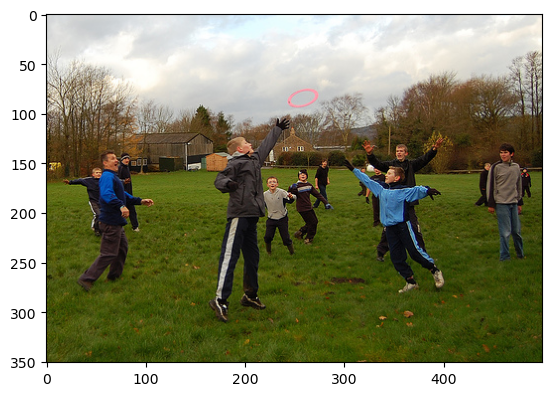

In [203]:
test_model(test_text['query_text'].sample(1))

327    A tennis player in a blue shirt celebrates his match .
Name: query_text, dtype: object

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Вероятность совпадения текста и изображения 84    0.473962
Name: value, dtype: float64


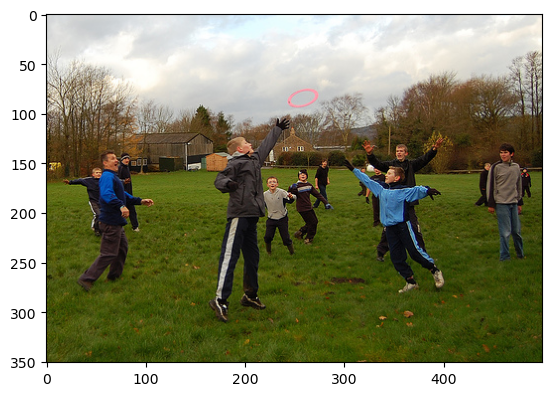

In [205]:
test_model(test_text['query_text'].sample(1))

230    A man in a black vest walks on a rail .
Name: query_text, dtype: object

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Вероятность совпадения текста и изображения 84    0.476771
Name: value, dtype: float64


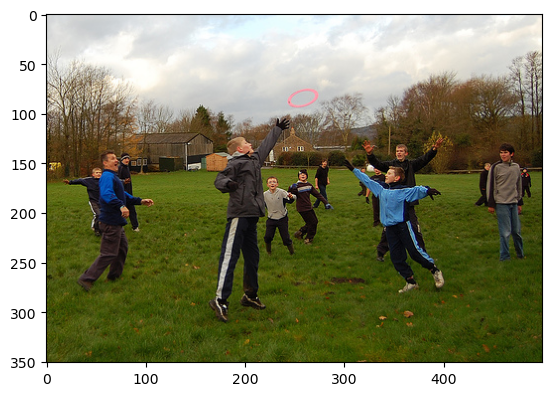

In [206]:
test_model(test_text['query_text'].sample(1))

274    a dog wears jeans .
Name: query_text, dtype: object

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Вероятность совпадения текста и изображения 84    0.480486
Name: value, dtype: float64


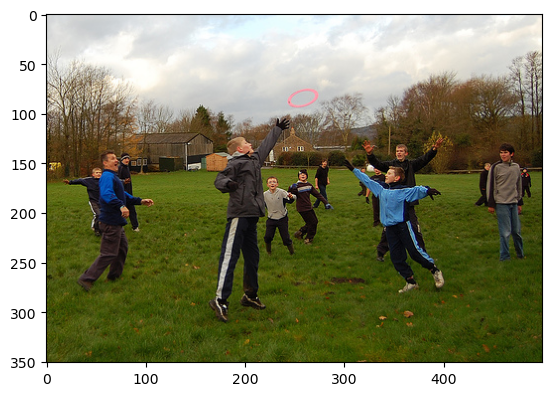

In [207]:
test_model(test_text['query_text'].sample(1))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, к сожалению поиск не работает. Основные причины:
    
 - очень слабая модель (один промежуточный слой с 10 нейронами), мало эпох обучения.
 - вектора полученные с помощью tf-idf более низкого качества, как правило лучший резульат получается при использовании эмбеддингов, полученных с помощью BERT
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

## Выводы

Для реализации проекта изображения и текстовые описания были преобразованы в векторы. Затем векторы объединяются друг с другом, а также с целевым значением - вероятность совпадения изображения и текста.
На этих данных были обучены 2 модели - линейная регрессия и нейронная сеть. Последняя показала лучший результат.

В результате тестирования, делаю вывод, что модель не справляется с задачей подбора подходящего изображения по тексту. На мой взгляд, количество представленных данных не может обеспечить какую-либо точность. Требуется гораздо больше данных для обучения. Возможно, стоит использовать другие подходы, например, рассматривать отдельно векторы изображений и текстов и искать между ними ближайшее расстояние.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
Наиболее критичные моменты я подсветил красными комментариями. 
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">  
Спасибо за наводку. Clip буду изучать уже позже.
</div>